Notebook for generating figures from SOM simulations: surface temperature, low cloud and precipitation anomalies

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import nctoolkit as nct

import xarray
import proplot as pplt

nctoolkit is using Climate Data Operators version 1.9.9


In [2]:
co2_dir = '/tdat/mdvorak/CMIP6/2xCO2'
pi_dir = '/tdat/mdvorak/CMIP6/tos'
plio_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos'
e_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/SOM'

In [3]:
# SOM simulations

e_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/SOM'

e_pi = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))
e_plio = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.TEMP.ICE.FORCING.76-126yrs.nc' %(e_dir))
e_plio_280 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.TEMP.ICE.FORCING.25-75yrs.nc' %(e_dir))
e_co2 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.569.4.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))
e_400 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.TEMP.ICE.FORCING.34-84yrs.nc' %(e_dir))

e_co2_long = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.569.4.cam.h0.TS.allyears_yearly.nc' %(e_dir))
som_weights = np.cos(np.deg2rad(e_pi.lat));

In [4]:
ocnfrac_pi = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.OCNFRAC.34-84yrs.nc' %(e_dir))
ocnfrac_plio = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.OCNFRAC.76-126yrs.nc' %(e_dir))

In [5]:
def time_weights(ds):
    month_length = ds.time.dt.days_in_month
    wgts = month_length.groupby("time.year") / month_length.groupby("time.year").sum()
    np.testing.assert_allclose(wgts.groupby("time.year").sum(xarray.ALL_DIMS), 1.0)
    
    return wgts

In [6]:
def lat_weights(ds):
    clat = np.cos(np.deg2rad(ds.lat)) 
    return clat / np.sum(clat) 

In [7]:
import cmocean
cmaps = cmocean.cm.cmap_d

In [12]:
# SOM meridional and zonal winds

e_pi_wind = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.WIND.34-84yrs.nc' %(e_dir))
e_plio_wind = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.WIND.76-126yrs.nc' %(e_dir))
e_plio_280_wind = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.WIND.25-75yrs.nc' %(e_dir))
e_co2_wind = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.569.4.cam.h0.WIND.34-84yrs.nc' %(e_dir))
e_400_wind = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.WIND.34-84yrs.nc' %(e_dir))

som_weights = np.cos(np.deg2rad(e_pi.lat));

In [8]:
# SOM meridional and zonal winds

e_pi_cld = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.CLDS.34-84yrs.nc' %(e_dir))
e_plio_cld = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.CLDS.76-126yrs.nc' %(e_dir))
e_plio_280_cld = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.CLDS.25-75yrs.nc' %(e_dir))
e_400_cld = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.CLDS.34-84yrs.nc' %(e_dir))

som_weights = np.cos(np.deg2rad(e_pi.lat));

In [9]:
# SOM meridional and zonal winds

e_pi_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.284.7.cam.h0.PRECIP.H2O.34-84yrs.nc' %(e_dir))
e_plio_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.400.cam.h0.PRECIP.H2O.76-126yrs.nc' %(e_dir))
e_plio_280_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cam.h0.PRECIP.H2O.25-75yrs.nc' %(e_dir))
e_400_precip = xarray.open_dataset('%s/e.e21.E1850.f09_g17.CMIP6-piControl.new.400.cam.h0.PRECIP.H2O.34-84yrs.nc' %(e_dir))


In [10]:
e_plio_SO = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.SOflx.TEMP.ICE.FORCING.34-64yrs.nc' %(e_dir))

In [11]:
# mask = xarray.open_dataset('/tdat/mdvorak/CMIP6/Pliocene/domain.lnd.fv0.9_1.25_gx1v6plioenh.190801.nc')
# mask['ni'] = mask.mask.xc[0,:]
# mask['nj'] = mask.mask.yc[:,0]

# mask = mask.rename(ni='lon',nj='lat')

mask = xarray.open_dataset('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM1.2/SOM/Pliocene_mask.nc')

In [12]:
e_dir2 = '/tdat/mdvorak/CMIP6/Pliocene/tos/CESM1.2/SOM'

pi_mask = xarray.open_dataset('%s/domain.ocn.gx1v6.090206_latlon.nc' %(e_dir2))

In [13]:
sst_plio = e_plio.TS.weighted(time_weights(e_plio)).mean('time')
sst_plio = sst_plio.where(sst_plio > 271.35, 271.35)
sst_plio = sst_plio.where(ocnfrac_plio.OCNFRAC.mean('time') > 0)

sst_plio_pi = e_plio_280.TS.weighted(time_weights(e_plio_280)).mean('time')
sst_plio_pi = sst_plio_pi.where(sst_plio_pi > 271.35, 271.35)
sst_plio_pi = sst_plio_pi.where(ocnfrac_plio.OCNFRAC.mean('time') > 0)

sst_400 = e_400.TS.weighted(time_weights(e_400)).mean('time')
sst_400 = sst_400.where(sst_400 > 271.35, 271.35)
sst_400 = sst_400.where(ocnfrac_pi.OCNFRAC.mean('time'))

sst_pi = e_pi.TS.weighted(time_weights(e_pi)).mean('time')
sst_pi = sst_pi.where(sst_pi > 271.35, 271.35)
sst_pi = sst_pi.where(ocnfrac_pi.OCNFRAC.mean('time'))

sst_plio_diff = (sst_plio - sst_pi)
#sst_plio_diff = sst_plio_diff.where(sst_plio_diff > -4)


sst_plio_pi_diff = (sst_plio_pi - sst_pi)
#sst_plio_pi_diff = sst_plio_pi_diff.where(sst_plio_pi_diff > -4)


sst_400_diff = (sst_400 - sst_pi)

In [15]:
ice_plio_280 = xarray.open_dataset('%s/e.e21.E1850.f09_g17.PMIP4-midPliocene.piflx.284.7.cice.h.AICE.52-75yrs_192x288.nc' %(e_dir))
aice_plio_pi = ice_plio_280.aice.mean('time')

In [19]:
icefrac_plio = e_plio.ICEFRAC.mean('time')
icefrac_plio_pi = e_plio_280.ICEFRAC.mean('time')
icefrac_400 = e_400.ICEFRAC.mean('time')
icefrac_pi = e_pi.ICEFRAC.mean('time')

In [20]:
((e_plio_SO.TS.weighted(time_weights(e_plio_SO)).mean('time').weighted(lat_weights(e_plio_SO)).mean(("lat","lon"))) - 
 (e_pi.TS.weighted(time_weights(e_pi)).mean('time').weighted(lat_weights(e_pi)).mean(("lat","lon"))))

<xarray.DataArray 'TS' ()>
array(4.59847098)

In [ ]:
co2_dir = '/tdat/mdvorak/CMIP6/2xCO2'
pi_dir = '/tdat/mdvorak/CMIP6/tos'
plio_dir = '/tdat/mdvorak/CMIP6/Pliocene/tos'

In [ ]:
ts_plio_new = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.001.cam.h0.TS.115101-120012.nc' %(plio_dir))
ts_plio_pi_new = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.PMIP4-midPliocene-eoi400.284.7.cam.h0.TS.035101-040512.nc' %(plio_dir))
ts_pi_new = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.h0.TS.190001-200012.nc' %(plio_dir))
ts_co2_new = xarray.open_dataset('%s/CESM2/b.e21.B1850.f09_g17.CMIP6-piControl.400.cam.h0.TS.812-902yrs.nc' %(plio_dir))

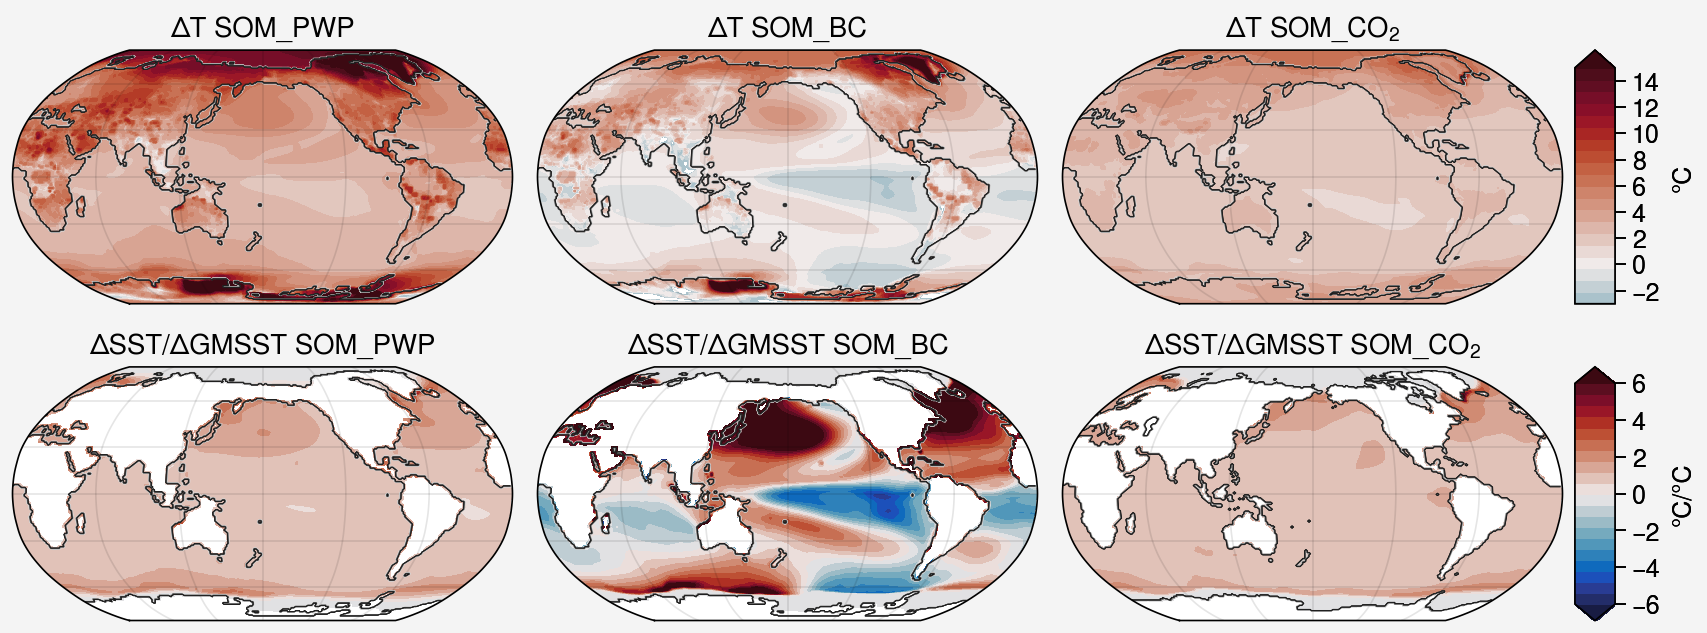

In [14]:
fig, axes = pplt.subplots(ncols=3, nrows=2, proj='robin', proj_kw={'lon_0': 180})

ts_plio_diff = e_plio.TS.weighted(time_weights(e_plio)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')
ts_plio_pidiff = e_plio_280.TS.weighted(time_weights(e_plio_280)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')
ts_co2_diff = e_400.TS.weighted(time_weights(e_400)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')
ts_plio_SO_diff = e_plio_SO.TS.weighted(time_weights(e_plio_SO)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')

cp = axes[0].contourf(ts_plio_diff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')
axes[1].contourf(ts_plio_pidiff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')
axes[2].contourf(ts_co2_diff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')

axes[2].colorbar(cp, ticks=2, label=('°C'))
axes[2].contour(mask.mask, cmap='black', linewidth=0.3)

for ax in axes[:2]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)

cp = axes[3].contourf(sst_plio_diff/(sst_plio_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                      levels=np.linspace(-6,6,21), extend='both', cmap='balance')
axes[4].contourf(sst_plio_pi_diff/(sst_plio_pi_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-6,6,21), extend='both', cmap='balance')

axes[5].contourf(sst_400_diff/(sst_400_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-6,6,21), extend='both', cmap='balance')

axes[5].colorbar(cp, ticks=2, label=('°C/°C'))
axes[5].contour(pi_mask.mask, cmap='black', linewidth=0.3) 

for ax in axes[3:5]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[0].set_title('\u0394T SOM_PWP')
axes[1].set_title('\u0394T SOM_BC')
axes[2].set_title('\u0394T SOM_CO$_2$')

axes[3].set_title('\u0394SST/\u0394GMSST SOM_PWP')
axes[4].set_title('\u0394SST/\u0394GMSST SOM_BC')
axes[5].set_title('\u0394SST/\u0394GMSST SOM_CO$_2$');

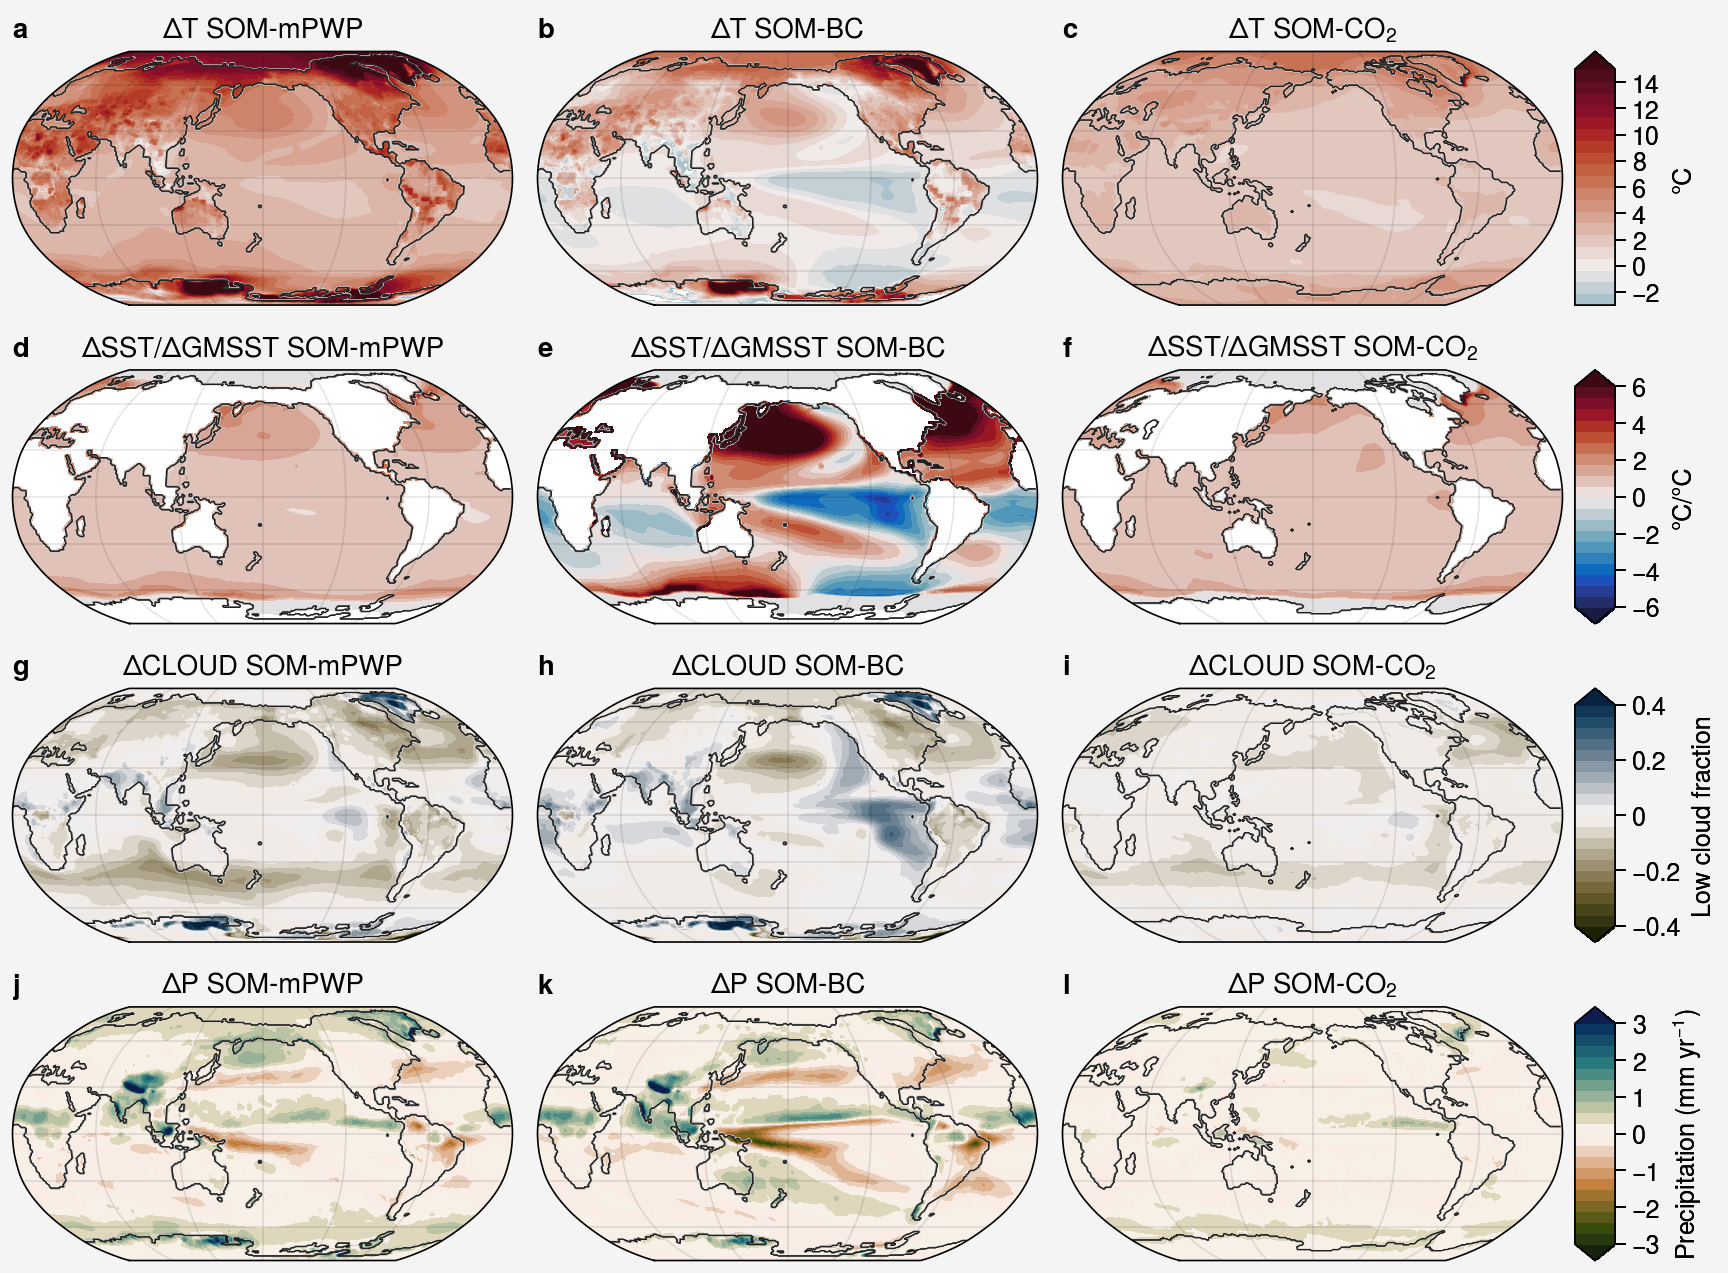

In [15]:
fig, axes = pplt.subplots(ncols=3, nrows=4, proj='robin', proj_kw={'lon_0': 180})

ts_plio_diff = e_plio.TS.weighted(time_weights(e_plio)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')
ts_plio_pidiff = e_plio_280.TS.weighted(time_weights(e_plio_280)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')
ts_co2_diff = e_400.TS.weighted(time_weights(e_400)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')
#ts_plio_SO_diff = e_plio_SO.TS.weighted(time_weights(e_plio_SO)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')

cld_plio_diff = e_plio_cld.CLDLOW.weighted(time_weights(e_plio_cld)).mean('time') - e_pi_cld.CLDLOW.weighted(time_weights(e_pi_cld)).mean('time')
cld_plio_pidiff = e_plio_280_cld.CLDLOW.weighted(time_weights(e_plio_280_cld)).mean('time') - e_pi_cld.CLDLOW.weighted(time_weights(e_pi_cld)).mean('time')
cld_co2_diff = e_400_cld.CLDLOW.weighted(time_weights(e_400_cld)).mean('time') - e_pi_cld.CLDLOW.weighted(time_weights(e_pi_cld)).mean('time')

precip_plio_diff = e_plio_precip.PRECL.weighted(time_weights(e_plio_precip)).mean('time') * 1e3 * 86400 - e_pi_precip.PRECL.weighted(time_weights(e_pi_precip)).mean('time') * 1e3 * 86400
precip_plio_pidiff = e_plio_280_precip.PRECL.weighted(time_weights(e_plio_280_precip)).mean('time') * 1e3 * 86400 - e_pi_precip.PRECL.weighted(time_weights(e_pi_precip)).mean('time') * 1e3 * 86400
precip_co2_diff = e_400_precip.PRECL.weighted(time_weights(e_400_precip)).mean('time') * 1e3 * 86400 - e_pi_precip.PRECL.weighted(time_weights(e_pi_precip)).mean('time') * 1e3 * 86400

cp = axes[0].contourf(ts_plio_diff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')
axes[1].contourf(ts_plio_pidiff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')
axes[2].contourf(ts_co2_diff, levels=np.linspace(-3,15,21), extend='max', cmap='balance')

axes[2].colorbar(cp, ticks=2, label=('°C'))
axes[2].contour(pi_mask.mask, cmap='black', linewidth=0.3)

for ax in axes[:2]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)

cp = axes[3].contourf(sst_plio_diff/(sst_plio_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                      levels=np.linspace(-6,6,21), extend='both', cmap='balance')
axes[4].contourf(sst_plio_pi_diff/(sst_plio_pi_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-6,6,21), extend='both', cmap='balance')

axes[5].contourf(sst_400_diff/(sst_400_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-6,6,21), extend='both', cmap='balance')

axes[5].colorbar(cp, ticks=2, label=('°C/°C'))
axes[5].contour(pi_mask.mask, cmap='black', linewidth=0.3)

for ax in axes[3:5]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
cp = axes[6].contourf(cld_plio_diff, levels=np.linspace(-0.4,0.4,21), extend='both', cmap=cmaps['diff_r'])
axes[7].contourf(cld_plio_pidiff, levels=np.linspace(-0.4,0.4,21), extend='both', cmap=cmaps['diff_r'])
axes[8].contourf(cld_co2_diff, levels=np.linspace(-0.4,0.4,21), extend='both', cmap=cmaps['diff_r'])

for ax in axes[6:8]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[8].contour(pi_mask.mask, cmap='black', linewidth=0.3)
axes[8].colorbar(cp, ticks=0.2, label='Low cloud fraction')

cp = axes[9].contourf(precip_plio_diff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[10].contourf(precip_plio_pidiff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])
axes[11].contourf(precip_co2_diff, levels=np.linspace(-3,3,21), extend='both', cmap=cmaps['tarn'])

for ax in axes[9:11]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[11].colorbar(cp, ticks=1.0, label='Precipitation (mm yr$^{-1}$)')

axes[0].set_title('\u0394T SOM-mPWP')
axes[1].set_title('\u0394T SOM-BC')
axes[2].set_title('\u0394T SOM-CO$_2$')

axes[3].set_title('\u0394SST/\u0394GMSST SOM-mPWP')
axes[4].set_title('\u0394SST/\u0394GMSST SOM-BC')
axes[5].set_title('\u0394SST/\u0394GMSST SOM-CO$_2$')

axes[6].set_title('\u0394CLOUD SOM-mPWP')
axes[7].set_title('\u0394CLOUD SOM-BC')
axes[8].set_title('\u0394CLOUD SOM-CO$_2$')

axes[9].set_title('\u0394P SOM-mPWP')
axes[10].set_title('\u0394P SOM-BC')
axes[11].set_title('\u0394P SOM-CO$_2$')

axes[11].contour(pi_mask.mask, cmap='black', linewidth=0.3)
fig.format(abc= True)

plt.savefig('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/figures/SOM_figure_wprecip_revised.pdf');


In [24]:
print(ts_plio_diff.weighted(lat_weights(ts_plio_diff)).mean(("lat","lon")),
      ts_plio_pidiff.weighted(lat_weights(ts_plio_pidiff)).mean(("lat","lon")),
      ts_co2_diff.weighted(lat_weights(ts_co2_diff)).mean(("lat","lon")))

ts_2xco2_diff = e_co2.TS.weighted(time_weights(e_co2)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')
print(ts_2xco2_diff.weighted(lat_weights(ts_2xco2_diff)).mean(("lat","lon")))

<xarray.DataArray 'TS' ()>
array(4.46093027) <xarray.DataArray 'TS' ()>
array(1.15458664) <xarray.DataArray 'TS' ()>
array(2.41294245)


In [31]:
print(toa_plio_diff.weighted(lat_weights(toa_plio_diff)).mean(("lat","lon")),
      toa_plio_pidiff.weighted(lat_weights(toa_plio_pidiff)).mean(("lat","lon")), 
      toa_co2_diff.weighted(lat_weights(toa_co2_diff)).mean(("lat","lon")), 
      toa_plio_SO_diff.weighted(lat_weights(toa_plio_SO_diff)).mean(("lat","lon")), 
      toa_2xco2_diff.weighted(lat_weights(toa_2xco2_diff)).mean(("lat","lon")))

<xarray.DataArray ()>
array(0.07737064) <xarray.DataArray ()>
array(0.02220024) <xarray.DataArray ()>
array(-0.03333021) <xarray.DataArray ()>
array(1.70863357) <xarray.DataArray ()>
array(0.08830952)


In [32]:
toa_plio = (e_plio.FSNT - e_plio.FLNT).weighted(time_weights(e_plio)).mean('time').weighted(lat_weights(e_plio)).mean(("lat","lon")) 
toa_plio_pi = (e_plio_280.FSNT - e_plio_280.FLNT).weighted(time_weights(e_plio_280)).mean('time').weighted(lat_weights(e_plio_280)).mean(("lat","lon")) 
toa_co2 = (e_400.FSNT - e_400.FLNT).weighted(time_weights(e_400)).mean('time').weighted(lat_weights(e_400)).mean(("lat","lon"))  
toa_plio_SO = (e_plio_SO.FSNT - e_plio_SO.FLNT).weighted(time_weights(e_plio_SO)).mean('time').weighted(lat_weights(e_plio_SO)).mean(("lat","lon"))  
toa_2xco2 = (e_co2.FSNT - e_co2.FLNT).weighted(time_weights(e_co2)).mean('time').weighted(lat_weights(e_co2)).mean(("lat","lon")) 
toa_pi = (e_pi.FSNT - e_pi.FLNT).weighted(time_weights(e_pi)).mean('time').weighted(lat_weights(e_pi)).mean(("lat","lon")) 

In [33]:
print(toa_plio - toa_pi)
print(toa_plio_pi - toa_pi)
print(toa_co2 - toa_pi)
print(toa_plio_SO - toa_pi)
print(toa_2xco2 - toa_pi)

<xarray.DataArray ()>
array(0.07737064)
<xarray.DataArray ()>
array(0.02220024)
<xarray.DataArray ()>
array(-0.03333021)
<xarray.DataArray ()>
array(0.17515602)
<xarray.DataArray ()>
array(0.08830952)


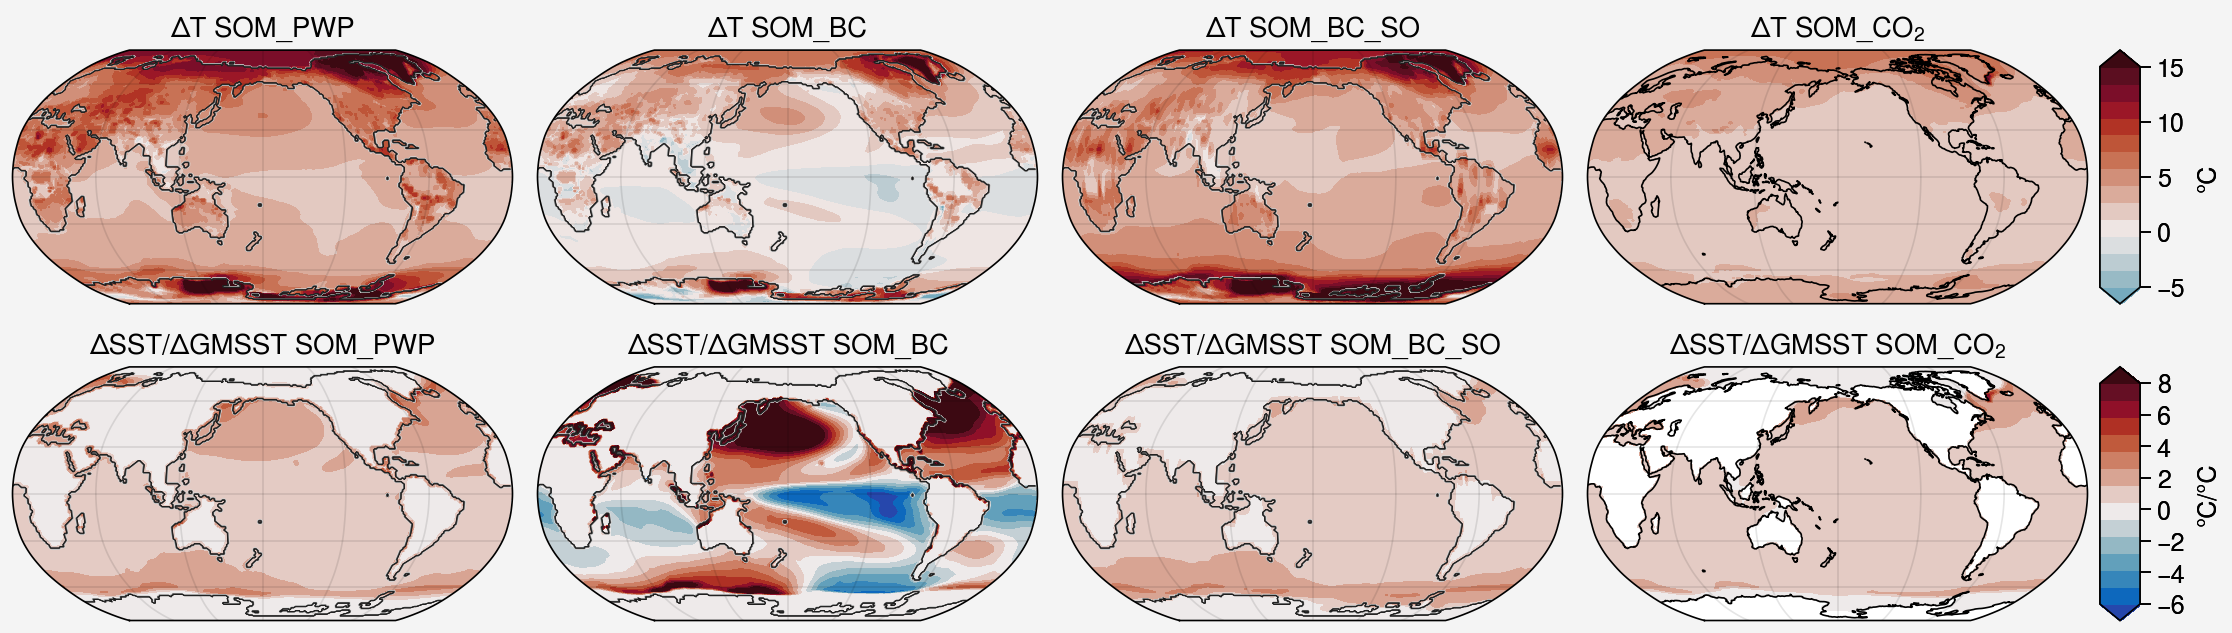

In [22]:
fig, axes = pplt.subplots(ncols=4, nrows=2, proj='robin', proj_kw={'lon_0': 180})

ts_plio_diff = e_plio.TS.mean('time') - e_pi.TS.mean('time')
ts_plio_pidiff = e_plio_280.TS.mean('time') - e_pi.TS.mean('time')
ts_co2_diff = e_400.TS.mean('time') - e_pi.TS.mean('time')
ts_plio_SO_diff = e_plio_SO.TS.mean('time') - e_pi.TS.mean('time')

cp = axes[0].contourf(ts_plio_diff, levels=np.linspace(-5,15,14), extend='both', cmap='balance')
axes[1].contourf(ts_plio_pidiff, levels=np.linspace(-5,15,14), extend='both', cmap='balance')
axes[2].contourf(ts_plio_SO_diff, levels=np.linspace(-5,15,14), extend='both', cmap='balance')
axes[3].contourf(ts_co2_diff, levels=np.linspace(-5,15,14), extend='both', cmap='balance')

axes[3].colorbar(cp, ticks=5, label=('°C'))
axes[3].coastlines()

for ax in axes[:3]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)

cp = axes[4].contourf(sst_plio_diff/(sst_plio_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                      levels=np.linspace(-6,8,14), extend='both', cmap='balance')
axes[5].contourf(sst_plio_pi_diff/(sst_plio_pi_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-6,8,14), extend='both', cmap='balance')
axes[6].contourf(sst_plio_SO_diff/(sst_plio_SO_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-6,8,14), extend='both', cmap='balance')

axes[7].contourf(sst_400_diff/(sst_400_diff.weighted(lat_weights(sst_plio_diff)).mean(("lat","lon"))), 
                 levels=np.linspace(-6,8,14), extend='both', cmap='balance')

axes[7].colorbar(cp, ticks=2, label=('°C/°C'))
axes[7].coastlines()

for ax in axes[4:7]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
axes[0].set_title('\u0394T SOM_PWP')
axes[1].set_title('\u0394T SOM_BC')
axes[3].set_title('\u0394T SOM_CO$_2$')
axes[2].set_title('\u0394T SOM_BC_SO')

axes[4].set_title('\u0394SST/\u0394GMSST SOM_PWP')
axes[5].set_title('\u0394SST/\u0394GMSST SOM_BC')
axes[7].set_title('\u0394SST/\u0394GMSST SOM_CO$_2$')
axes[6].set_title('\u0394SST/\u0394GMSST SOM_BC_SO');

In [17]:
sst_plio_pi = ts_plio_pi_new.TS.weighted(time_weights(ts_plio_pi_new)).mean('time').where(ocnfrac_plio.OCNFRAC.mean('time'))
sst_plio_pi = sst_plio_pi.where(sst_plio_pi > 271.35, 271.35)

sst_SO = e_plio_SO.TS.weighted(time_weights(e_plio_SO)).mean('time').where(ocnfrac_plio.OCNFRAC.mean('time'))
sst_SO = sst_SO.where(sst_SO > 271.35, 271.35)

sst_pi = e_pi.TS.weighted(time_weights(e_pi)).mean('time').where(ocnfrac_pi.OCNFRAC.mean('time'))
sst_pi = sst_pi.where(sst_pi > 271.35, 271.35);

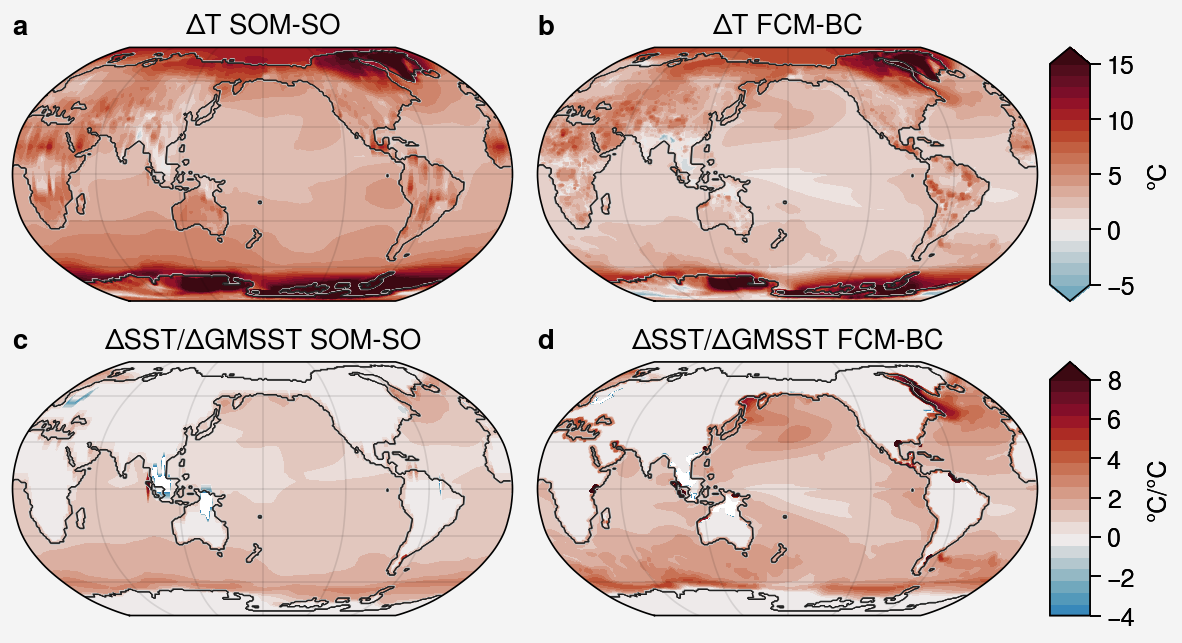

In [19]:
fig, axes = pplt.subplots(ncols=2, nrows=2, proj='robin', proj_kw={'lon_0': 180})

b_pi_ts = ts_pi_new.TS.weighted(time_weights(ts_pi_new)).mean('time')
b_plio_pi_ts = ts_plio_pi_new.TS.weighted(time_weights(ts_plio_pi_new)).mean('time')
b_plio_pi_ts_diff = b_plio_pi_ts - b_pi_ts

ts_plio_SO_diff = e_plio_SO.TS.weighted(time_weights(e_plio_SO)).mean('time') - e_pi.TS.weighted(time_weights(e_pi)).mean('time')

b_pi_sst = b_pi_ts.where(ocnfrac_pi.OCNFRAC.mean('time'))
b_pi_sst = b_pi_sst.where(b_pi_sst > 271.35, 271.35)

b_plio_pi_sst = b_plio_pi_ts.where(ocnfrac_plio.OCNFRAC.mean('time'))
b_plio_pi_sst = b_plio_pi_sst.where(b_plio_pi_sst > 271.35, 271.35)

b_plio_pi_sst_diff = b_plio_pi_sst - b_pi_sst.where(ocnfrac_plio.OCNFRAC.mean('time'))

cp = axes[0].contourf(ts_plio_SO_diff, levels=np.linspace(-5,15,21), extend='both', cmap='balance')
axes[1].contourf(b_plio_pi_ts_diff, levels=np.linspace(-5,15,21), extend='both', cmap='balance')

axes[1].colorbar(cp, ticks=5, label=('°C'))


for ax in axes:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    ax.format(abc=True)
cp = axes[2].contourf((sst_SO - sst_pi)/(sst_plio_SO - sst_pi).weighted(lat_weights(sst_plio_SO)).mean(("lat","lon")), 
                 levels=np.linspace(-4,8,21), extend='max', cmap='balance')
axes[3].contourf((sst_plio_pi-b_pi_sst)/(sst_plio_pi-b_pi_sst).weighted(lat_weights(sst_plio_pi)).mean(("lat","lon")), 
                 levels=np.linspace(-4,8,21), extend='max', cmap='balance')

axes[3].colorbar(cp, ticks=2, label=('°C/°C'))

axes[0].set_title('\u0394T SOM-SO')
axes[2].set_title('\u0394SST/\u0394GMSST SOM-SO')
axes[1].set_title('\u0394T FCM-BC')
axes[3].set_title('\u0394SST/\u0394GMSST FCM-BC')

plt.savefig('/tdat/mdvorak/CMIP6/Pliocene/tos/CESM2/figures/SOM_SOvFCM_BC.pdf')

In [ ]:
print(ts_plio_diff.weighted(som_weights).mean(("lat","lon")), ts_plio_pidiff.weighted(som_weights).mean(("lat","lon")), ts_co2_diff.weighted(som_weights).mean(("lat","lon")))

<xarray.DataArray 'TS' ()>
array(4.46675763) <xarray.DataArray 'TS' ()>
array(1.16294221) <xarray.DataArray 'TS' ()>
array(2.41867798)


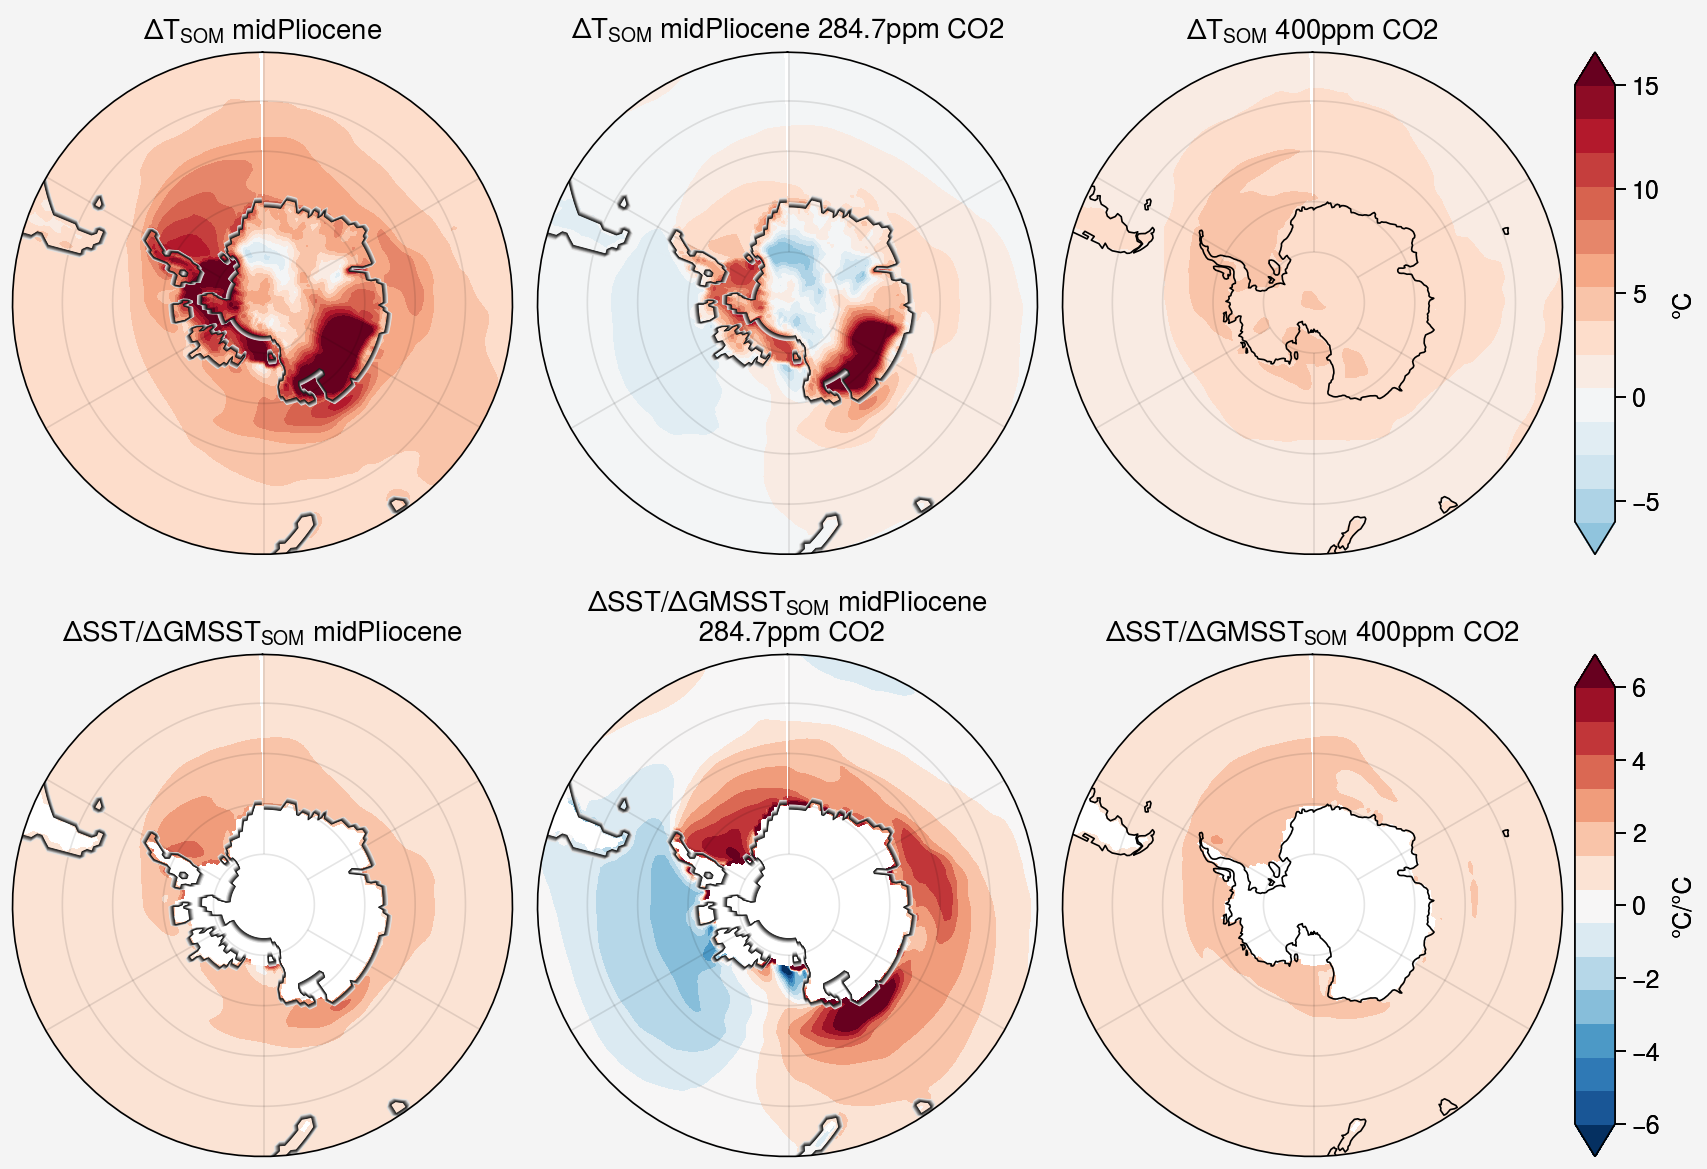

In [64]:
fig, axes = pplt.subplots(ncols=3, nrows=2, proj='spaeqd', proj_kw={'lon_0': 0})

ts_plio_diff = e_plio.TS.mean('time') - e_pi.TS.mean('time')
ts_plio_pidiff = e_plio_280.TS.mean('time') - e_pi.TS.mean('time')
ts_co2_diff = e_400.TS.mean('time') - e_pi.TS.mean('time')

cp = axes[0].contourf(ts_plio_diff, levels=np.linspace(-6,15,14), extend='both')
axes[1].contourf(ts_plio_pidiff, levels=np.linspace(-6,15,14), extend='both')
axes[2].contourf(ts_co2_diff, levels=np.linspace(-6,15,14), extend='both')
axes[2].colorbar(cp, ticks=5, label=('°C'))
axes[2].coastlines()

for ax in axes[:2]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    
cp = axes[3].contourf(sst_plio/sst_plio.weighted(som_weights).mean(("lat","lon")), levels=np.linspace(-6,6,14), extend='both')
axes[4].contourf(sst_plio_pi/sst_plio_pi.weighted(som_weights).mean(("lat","lon")), levels=np.linspace(-6,6,14), extend='both')
axes[5].contourf(sst_400/sst_400.weighted(som_weights).mean(("lat","lon")), levels=np.linspace(-6,6,14), extend='both')
axes[5].colorbar(cp, ticks=2, label=('°C/°C'))
axes[5].coastlines()

for ax in axes[3:5]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)

    
axes[0].set_title('\u0394T$_{SOM}$ midPliocene')
axes[1].set_title('\u0394T$_{SOM}$ midPliocene 284.7ppm CO2')
axes[2].set_title('\u0394T$_{SOM}$ 400ppm CO2')
    
axes[3].set_title('\u0394SST/\u0394GMSST$_{SOM}$ midPliocene')
axes[4].set_title('\u0394SST/\u0394GMSST$_{SOM}$ midPliocene \n 284.7ppm CO2')
axes[5].set_title('\u0394SST/\u0394GMSST$_{SOM}$ 400ppm CO2')
axes.format(boundinglat=-40)

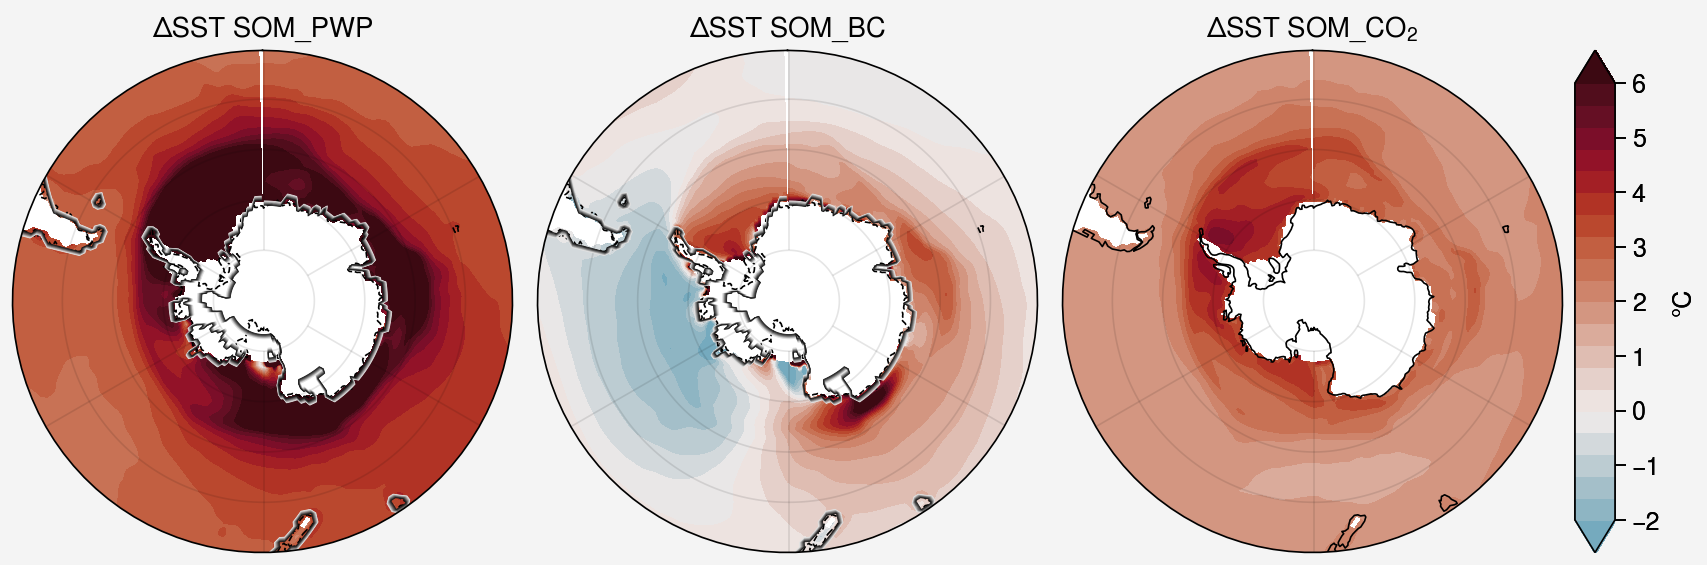

In [16]:
import cmocean
cmaps = cmocean.cm.cmap_d

fig, axes = pplt.subplots(ncols=3, nrows=1, proj='spaeqd', proj_kw={'lon_0': 0})

ts_plio_diff = e_plio.TS.mean('time') - e_pi.TS.mean('time')
ts_plio_pidiff = e_plio_280.TS.mean('time') - e_pi.TS.mean('time')
ts_co2_diff = e_400.TS.mean('time') - e_pi.TS.mean('time')

cp = axes[0].contourf(sst_plio, N=np.linspace(-2,6,21), extend='both', cmap=cmaps['balance'])
axes[1].contourf(sst_plio_pi, N=np.linspace(-2,6,21), extend='both', cmap=cmaps['balance'])
axes[2].contourf(sst_400, N=np.linspace(-2,6,21), extend='both', cmap=cmaps['balance'])
axes[2].colorbar(cp, ticks=1, label=('°C'))
axes[2].coastlines()

for ax in axes[:2]:
    ax.contour(mask.mask, cmap='black', linewidth=0.3)
    ax.coastlines(linestyle='dashed')
axes[0].set_title('\u0394SST SOM_PWP')
axes[1].set_title('\u0394SST SOM_BC')
axes[2].set_title('\u0394SST SOM_CO$_2$')
axes.format(boundinglat=-40);